In [414]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

In [415]:
fl_path = '/home/pelto/Desktop/ice_flux/Illecillewaet/'
gpr_path = '/home/pelto/GIS/GPR/ComparisonData/Illec/'
vdir ='img1_20160912__img1_20170917_vmap_5m_35px_spm2/'
vdir1 = '/home/pelto/Desktop/velocity_mapping/illec/spm2/' + vdir
path = '/home/pelto/Desktop/lidar_cbt_analysis/illecillewaet/'


In [416]:
# velX = flux_gate_velocity(vdir, 'conrad_2016_ice_msk_5m_glacieronly.tif', 'conrad_flux_gates_17.shp')
# 'conrad_points_17gates.shp')

In [417]:
# NC = '/home/pelto/oggm_runs/products_opt/Illecillewaet/Illecillewaet101sw_MAE_optimized.nc'
# oggm_dem=salem.open_xr_dataset(fl_path+ 'dem.tif')
# nc_grid= oggm_dem.salem.grid 
# H_opt = salem.GeoNetcdf(NC, grid=nc_grid)
# H_opt= salem.GeoNetcdf.get_vardata(H_opt, 'distributed_thickness')
# # HO = H_opt.to_array(name='HOPT')


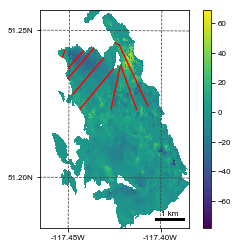

In [418]:
gates = 'Illec_flux_gates_16.shp'

# open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
msk = salem.open_xr_dataset(fl_path + 'illec_all_glaciers_2016.tif') 
msk = msk.to_array(name='msk')
gpr = salem.open_xr_dataset(fl_path + 'gpr_outline_50_100m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
# H_opt = salem.GeoNetcdf(opt_path + 'Conrad101sw_MAE_optimized.nc')
H_opt = salem.open_xr_dataset(fl_path + 'Illecillewaet101sw_MAE_optimized.tif') #'Conrad101sw_MAE_optimized.nc'
#     pts = salem.read_shapefile(fl_path+pts)
gates = salem.read_shapefile(fl_path+gates)
# msk[msk == 0.0] = 2.0
# msk[msk == 1.0] = np.nan
# pts_ras = pts_ras.to_array()
# ptsID = ptsID.to_array()
vx = vx.to_array(name='vx')
# np.shape(vx[0]) remove index 1 i.e.: 1,2000,3000
vy = vy.to_array(name='vy')
gpr = gpr.to_array(name='gpr')

H_opt_reproj = vx.salem.transform(H_opt)
H_opt = H_opt_reproj.to_array(name='H_opt')


# ptsID.data[ptsID.data<-1000] = np.nan
# pts_ras.data[pts_ras.data<-1000] = np.nan
gpr.data[gpr.data<0] = np.nan
gpr.data[gpr.data==1.000] == 0.0   #not having any effect
vx.data[msk.data==0] = np.nan
vy.data[msk.data==0] = np.nan

topo = '/home/pelto/Desktop/lidar_cbt_analysis/illecillewaet/160912_illecillewaet_dem1_clip_master.tif'
dem = salem.open_xr_dataset(topo)
dem_reproj = vx.salem.transform(dem)
dem = dem_reproj.to_array(name='dem')
dem.data[dem.data<1] = np.nan

# H_opt_reproj=vx.salem.transform(H_opt)
# H_opt = H_opt_reproj.to_array(name='H_opt')

#     # map extent
# grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000)) ##zoomed out view
grid = vx.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
sm.set_scale_bar()
sm.set_data(vx)

#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, linewidth=1)
sm.set_shapefile(gates, linewidth=1.5, color='r')
sm.visualize()
plt.show()

In [419]:
dem

<xarray.DataArray 'dem' (variable: 1, y: 1644, x: 1126)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * x         (x) float64 4.675e+05 4.675e+05 4.675e+05 ... 4.731e+05 4.731e+05
  * y         (y) float64 5.678e+06 5.678e+06 5.678e+06 ... 5.67e+06 5.67e+06
  * variable  (variable) <U4 'data'
Attributes:
    pyproj_srs:  +units=m +init=epsg:32611 

In [420]:
H_opt

<xarray.DataArray 'H_opt' (variable: 1, y: 1644, x: 1126)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * x         (x) float64 4.675e+05 4.675e+05 4.675e+05 ... 4.731e+05 4.731e+05
  * y         (y) float64 5.678e+06 5.678e+06 5.678e+06 ... 5.67e+06 5.67e+06
  * variable  (variable) <U4 'data'
Attributes:
    pyproj_srs:  +units=m +init=epsg:32611 

In [421]:
len(gpr.data[gpr.data==0.000])

0

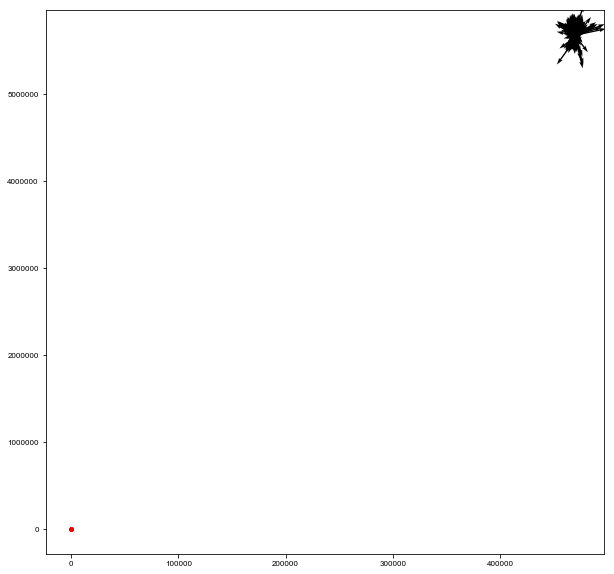

In [422]:
fig, ax = plt.subplots(1,1,figsize=(10,10))


df = salem.read_shapefile(fl_path + 'illec_flux_gates_16_pts_20m.shp') ## wgs84'illec_flux_gates_16_pts_20m.shp'

coords = np.array([p.xy for p in df.geometry]).squeeze()
df['lon'] = coords[:, 0]
df['lat'] = coords[:, 1]
# df['lon'] = df[4]
# df['lat'] = df[5]


xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
df['x'] = xx
df['y'] = yy

ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);


X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
U = vx.data[0]
V = vy.data[0]

# Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')
# ax.set_xlim(502500, 507500)
# ax.set_ylim( 5624000, 5631500)
#     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
# plt.savefig(fl_path+ 'products/'+ 'conrad_16_17_quiver.pdf', dpi=300)

In [423]:
# grid = vx.salem.grid  ##full view
# sm = Map(grid, countries=False)
# sm.set_lonlat_contours(interval=0)
# sm.set_scale_bar()
# sm.set_data(vx)

# #      Change the lon-lat countour setting
# sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


# shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
# gdf = salem.read_shapefile(shpf)
# sm.set_shapefile(gdf, linewidth=1)
# sm.set_shapefile(gates, linewidth=1.5, color='r')
# sm.visualize()

In [424]:
vns = ['vx',
       'vy',
       'gpr',
       'H_opt',
       'dem'
       #'msk',
       ]

In [425]:
vns

['vx', 'vy', 'gpr', 'H_opt', 'dem']

In [426]:
M = xr.merge([vx,vy,gpr,H_opt,dem]) #dem

In [427]:
M.gpr.mean()

<xarray.DataArray 'gpr' ()>
array(94.92317, dtype=float32)

In [428]:
for vn in vns:
    df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

In [429]:
df

,id,len,distance,angle,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt,dem
0,3,1836.5,0.0,40.448468,POINT (-117.4481437497871 51.22812408699438),-117.448144,-117.448144,51.228124,51.228124,-117.448144,51.228124,468708.453948,5.675289e+06,-1.144019,4.566843,NaN,55.195427,2553.357192
1,3,1836.5,20.0,40.448468,POINT (-117.4479592583071 51.22826165279167),-117.447959,-117.447959,51.228262,51.228262,-117.447959,51.228262,468721.429225,5.675304e+06,0.780996,7.705281,NaN,55.195427,2549.823877
2,3,1836.5,40.0,40.448468,POINT (-117.4477747657278 51.22839921829764),-117.447775,-117.447775,51.228399,51.228399,-117.447775,51.228399,468734.404503,5.675319e+06,1.458560,8.893366,47.970001,67.173894,2544.928728
3,3,1836.5,60.0,40.448468,POINT (-117.4475902720491 51.22853678351225),-117.447590,-117.447590,51.228537,51.228537,-117.447590,51.228537,468747.379780,5.675335e+06,2.959507,11.075131,47.970001,75.314514,2539.381514
4,3,1836.5,80.0,40.448468,POINT (-117.447405777271 51.22867434843553),-117.447406,-117.447406,51.228674,51.228674,-117.447406,51.228674,468760.355057,5.675350e+06,3.496354,12.118198,47.970001,75.314514,2534.969113
5,3,1836.5,100.0,40.448468,POINT (-117.4472212813936 51.22881191306747),-117.447221,-117.447221,51.228812,51.228812,-117.447221,51.228812,468773.330335,5.675365e+06,4.454827,13.742944,47.970001,78.852608,2530.333804
6,3,1836.5,120.0,40.448468,POINT (-117.4470367844168 51.22894947740806),-117.447037,-117.447037,51.228949,51.228949,-117.447037,51.228949,468786.305612,5.675380e+06,4.226677,13.142326,83.160004,88.150208,2526.468915
7,3,1836.5,140.0,40.448468,POINT (-117.4468522863406 51.22908704145728),-117.446852,-117.446852,51.229087,51.229087,-117.446852,51.229087,468799.280890,5.675396e+06,2.042076,8.510769,83.160004,88.150208,2522.477621
8,3,1836.5,160.0,40.448468,POINT (-117.446667787165 51.22922460521517),-117.446668,-117.446668,51.229225,51.229225,-117.446668,51.229225,468812.256167,5.675411e+06,3.426400,8.677508,83.160004,87.283583,2519.042418
9,3,1836.5,180.0,40.448468,POINT (-117.4464832868899 51.22936216868169),-117.446483,-117.446483,51.229362,51.229362,-117.446483,51.229362,468825.231445,5.675426e+06,3.781303,7.901494,83.160004,85.762032,2516.067243


In [430]:
# grid.ij_coordinates
# v_crs = check_crs(vx)
# v_crs

In [431]:
df_agg = df[['id', 'len', 'distance', 'angle', 'geometry', 'lon', 'lat']].copy()
ii, jj = grid.transform(df['lon'], df['lat'], crs=salem.wgs84, nearest=True)
df_agg['i'] = ii
df_agg['j'] = jj
# # We trick by creating an index of similar i's and j's
# df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in (vx.coords['x'], vx.coords['y'])]
df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii, jj)]
df_agg = df_agg.groupby('ij').mean()

In [432]:
# Select
for vn in vns:
    df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i), y=('z', df_agg.j))

In [433]:
D = df_agg[['id', 'len', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy', 'gpr', 'H_opt']].copy()
D

,id,len,distance,angle,lon,lat,vx,vy,gpr,H_opt
ij,,,,,,,,,,
0169_0360,0,329.2,0.0,16.530925,-117.453702,51.240545,NaN,NaN,1.000000,6.393974
0170_0356,0,329.2,20.0,16.530925,-117.453622,51.240718,6.407998,4.000798,33.270000,7.437881
0171_0353,0,329.2,40.0,16.530925,-117.453542,51.240890,6.247455,4.975158,33.270000,7.437881
0172_0349,0,329.2,60.0,16.530925,-117.453463,51.241063,6.336468,4.262638,33.270000,7.437881
0174_0345,0,329.2,80.0,16.530925,-117.453383,51.241236,-0.115401,5.490898,33.270000,12.621210
0175_0341,0,329.2,100.0,16.530925,-117.453303,51.241408,3.799920,2.416204,33.270000,12.621210
0176_0337,0,329.2,120.0,16.530925,-117.453223,51.241581,4.175584,-0.066663,34.990002,14.709440
0177_0333,0,329.2,140.0,16.530925,-117.453143,51.241754,5.396251,-2.728423,34.990002,14.709440
0178_0330,0,329.2,160.0,16.530925,-117.453063,51.241927,-0.806588,0.724846,34.990002,14.709440


In [434]:
import math
D['vz'] = np.sqrt(D.vx**2 + D.vy**2 )  # np.sqrt(U**2 + V**2 )

D['vzdir'] = np.arcsin(D.vx/D.vz) *180/math.pi #degrees from north
D.vzdir[D.vzdir>0.0]=np.nan ## remove false velocity vectors which plague the accumulation zone

### calculate angle of flux gate
#try making a raster with footprint of vel. raster with FG angle as the value
# FG_alpha = pts_ras.data - 90.0 # calculate normal angle to flux gate 

#multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.))) #velocity normal to gate per slice
D['Qopt'] = D.vfg * 0.9 * 20. * D.H_opt     ## ice flux per slice *0.9 to est. depth-integrated velocity
D['a'] = 20. * D.H_opt #area per slice

/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [435]:
D

,id,len,distance,angle,lon,lat,vx,vy,gpr,H_opt,vz,vzdir,vfg,Qopt,a
ij,,,,,,,,,,,,,,,
0169_0360,0,329.2,0.0,16.530925,-117.453702,51.240545,NaN,NaN,1.000000,6.393974,NaN,NaN,NaN,NaN,127.879478
0170_0356,0,329.2,20.0,16.530925,-117.453622,51.240718,6.407998,4.000798,33.270000,7.437881,7.554390,NaN,NaN,NaN,148.757614
0171_0353,0,329.2,40.0,16.530925,-117.453542,51.240890,6.247455,4.975158,33.270000,7.437881,7.986420,NaN,NaN,NaN,148.757614
0172_0349,0,329.2,60.0,16.530925,-117.453463,51.241063,6.336468,4.262638,33.270000,7.437881,7.636813,NaN,NaN,NaN,148.757614
0174_0345,0,329.2,80.0,16.530925,-117.453383,51.241236,-0.115401,5.490898,33.270000,12.621210,5.492110,-1.203992,1.672971,380.068595,252.424194
0175_0341,0,329.2,100.0,16.530925,-117.453303,51.241408,3.799920,2.416204,33.270000,12.621210,4.503047,NaN,NaN,NaN,252.424194
0176_0337,0,329.2,120.0,16.530925,-117.453223,51.241581,4.175584,-0.066663,34.990002,14.709440,4.176116,NaN,NaN,NaN,294.188812
0177_0333,0,329.2,140.0,16.530925,-117.453143,51.241754,5.396251,-2.728423,34.990002,14.709440,6.046802,NaN,NaN,NaN,294.188812
0178_0330,0,329.2,160.0,16.530925,-117.453063,51.241927,-0.806588,0.724846,34.990002,14.709440,1.084428,-48.055340,0.979491,259.339684,294.188812


In [436]:
# for i in range(7):
#     print(i, np.nanmean(D.vzdir[D.id==i]))

In [437]:
range(D.id.nunique()-1)

range(0, 7)

In [438]:
Q_out= [0.,] #flux out per gate
cr_area = [0.,] # cross-section area per gate
vzdir = [0.,]

for n in range(D.id.nunique()+1):
        Q_out.append(D.Qopt[D.id==n].sum()) 
        cr_area.append(D.a[D.id==n].sum())
        vzdir.append(D.vzdir[D.id==n].mean())           
Q_in = [Q_out[1:]] #flux in per bin
Q_in = np.squeeze(Q_in)
# Q_in[]



FG = pd.DataFrame(list(zip(Q_out, Q_in, cr_area, vzdir)), columns=['Q_out', 'Q_in', 'cr_area', 'vzdir']) 

FG['vfg'] = FG.Q_out / FG.cr_area #net velocity per gate
FG['bin']=np.arange(0,9,1)
FG

,Q_out,Q_in,cr_area,vzdir,vfg,bin
0,0.000000e+00,3.263113e+03,0.000000,0.000000,NaN,0
1,3.263113e+03,1.114654e+06,4793.717285,-34.727295,0.680706,1
2,1.114654e+06,1.830064e+06,48849.203125,-49.477333,22.818254,2
3,1.830064e+06,4.022060e+06,135301.875000,-47.189762,13.525786,3
4,4.022060e+06,3.137089e+06,234394.625000,-31.800621,17.159351,4
5,3.137089e+06,9.315128e+05,211227.937500,-16.340620,14.851679,5
6,9.315128e+05,5.097539e+04,224668.890625,-16.115475,4.146158,6
7,5.097539e+04,3.602696e+05,218781.328125,-15.523784,0.232997,7
8,3.602696e+05,0.000000e+00,253746.765625,-60.604557,1.419800,8


### import data per bin: height change, elevation, surface area, obs.SMB etc. 

In [456]:
import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
import rasterio.plot as rplt
from rasterio.features import rasterize
from rasterstats import zonal_stats

# https://community.esri.com/groups/python-snippets/blog/2019/05/07/calculating-zonal-statistics-with-python-rasterstats
# For loading shapefiles into geopandas dataframe
def loadshp_as_gpd(shp):
    data = gpd.read_file(shp)
    return data

# For re-projecting input vector layer to raster projection
def reproject(fcgpd, raster):
    proj = raster.crs.to_proj4()
    print("Original vector layer projection: ", fcgpd.crs)
    reproj = fcgpd.to_crs(proj)
    print("New vector layer projection (PROJ4): ", reproj.crs)
    fig, ax = plt.subplots(figsize=(15, 15))
    rplt.show(raster, ax=ax)
    reproj.plot(ax=ax, facecolor='none', edgecolor='red')
    fig.show()
    return reproj

def dissolve_gpd(df):
    field_list = list_columns(df)
    index = int(input("Dissolve by which field (index)? "))
    dgpd = df.dissolve(by=field_list[index])
    return dgpd

# For selecting which raster statistics to calculate
def stats_select():
    stats_list = ['mean','std', 'median']
    enum_items(stats_list)
    indices = input("Enter raster statistics selections separated by space: ")
    stats  = list(indices.split())
    out_stats = list()
    for i in stats:
        out_stats.append(stats_list[int(i)])
    return out_stats

def get_zonal_stats(vector, raster, stats):
    # Run zonal statistics, store result in geopandas dataframe
    result = zonal_stats(vector, raster, stats=stats, geojson_out=True)
    geostats = gpd.GeoDataFrame.from_features(result)
    return geostats

ModuleNotFoundError: No module named 'rasterstats'

NameError: name 'gpd' is not defined

In [439]:
data = pd.read_csv(fl_path + 'illec_bins_17.csv') #need dh_dt, area, field pts, n, mid elev (mean elev)
data.sort_values(by=['bin'],ascending=True, inplace=True) # sort by bin
data.set_index('bin', inplace=True) # set bin as index for sorting
data

,area,dh1617_mea,dh1617_med,dh1617_std,elev16_mea,elev16_med,elev16_std,v1617f_mea,v1617f_med,v1617f_std,rho
bin,,,,,,,,,,,
0,56544.9,-3.746838,-3.488281,2.030030,2070.356384,2073.121094,24.749604,4.403214,4.610128,1.791896,910
1,367983.6,-1.738773,-1.773193,2.548527,2224.614408,2237.189209,56.631701,16.224167,10.086801,13.925160,910
2,320633.6,-1.448285,-1.444092,1.736628,2325.707606,2322.538086,30.008066,16.889561,13.261891,12.787306,910
3,864054.2,-1.213892,-1.194824,0.833460,2395.147650,2390.635742,41.078025,17.775730,16.430992,10.298367,910
4,1093098.0,-1.217442,-1.186279,0.529372,2479.615199,2460.371582,54.511542,24.443107,26.599785,11.136316,900
5,1227845.9,-1.142544,-1.149170,0.984108,2547.144980,2532.567871,50.020876,20.339941,19.729391,10.705012,725
6,845146.7,-1.042554,-1.032471,0.620886,2553.780293,2548.173828,18.234675,15.246894,15.172138,7.332585,600
7,672676.8,-1.155929,-1.100098,0.218582,2580.432067,2575.529419,20.373179,16.916582,14.395066,11.425853,600
8,1813001.0,-1.359829,-1.266357,0.460971,2644.718628,2636.608398,45.160541,16.834451,12.587402,13.523308,750


In [440]:
FG_df =  pd.concat([FG, data], axis=1)
FG_df

,Q_out,Q_in,cr_area,vzdir,vfg,bin,area,dh1617_mea,dh1617_med,dh1617_std,elev16_mea,elev16_med,elev16_std,v1617f_mea,v1617f_med,v1617f_std,rho
0,0.000000e+00,3.263113e+03,0.000000,0.000000,NaN,0,56544.9,-3.746838,-3.488281,2.030030,2070.356384,2073.121094,24.749604,4.403214,4.610128,1.791896,910
1,3.263113e+03,1.114654e+06,4793.717285,-34.727295,0.680706,1,367983.6,-1.738773,-1.773193,2.548527,2224.614408,2237.189209,56.631701,16.224167,10.086801,13.925160,910
2,1.114654e+06,1.830064e+06,48849.203125,-49.477333,22.818254,2,320633.6,-1.448285,-1.444092,1.736628,2325.707606,2322.538086,30.008066,16.889561,13.261891,12.787306,910
3,1.830064e+06,4.022060e+06,135301.875000,-47.189762,13.525786,3,864054.2,-1.213892,-1.194824,0.833460,2395.147650,2390.635742,41.078025,17.775730,16.430992,10.298367,910
4,4.022060e+06,3.137089e+06,234394.625000,-31.800621,17.159351,4,1093098.0,-1.217442,-1.186279,0.529372,2479.615199,2460.371582,54.511542,24.443107,26.599785,11.136316,900
5,3.137089e+06,9.315128e+05,211227.937500,-16.340620,14.851679,5,1227845.9,-1.142544,-1.149170,0.984108,2547.144980,2532.567871,50.020876,20.339941,19.729391,10.705012,725
6,9.315128e+05,5.097539e+04,224668.890625,-16.115475,4.146158,6,845146.7,-1.042554,-1.032471,0.620886,2553.780293,2548.173828,18.234675,15.246894,15.172138,7.332585,600
7,5.097539e+04,3.602696e+05,218781.328125,-15.523784,0.232997,7,672676.8,-1.155929,-1.100098,0.218582,2580.432067,2575.529419,20.373179,16.916582,14.395066,11.425853,600
8,3.602696e+05,0.000000e+00,253746.765625,-60.604557,1.419800,8,1813001.0,-1.359829,-1.266357,0.460971,2644.718628,2636.608398,45.160541,16.834451,12.587402,13.523308,750


In [441]:
FG_df['Q_net'] = FG_df.Q_in - FG_df.Q_out  #net flux per gate
FG_df   #[0:4]

,Q_out,Q_in,cr_area,vzdir,vfg,bin,area,dh1617_mea,dh1617_med,dh1617_std,elev16_mea,elev16_med,elev16_std,v1617f_mea,v1617f_med,v1617f_std,rho,Q_net
0,0.000000e+00,3.263113e+03,0.000000,0.000000,NaN,0,56544.9,-3.746838,-3.488281,2.030030,2070.356384,2073.121094,24.749604,4.403214,4.610128,1.791896,910,3.263113e+03
1,3.263113e+03,1.114654e+06,4793.717285,-34.727295,0.680706,1,367983.6,-1.738773,-1.773193,2.548527,2224.614408,2237.189209,56.631701,16.224167,10.086801,13.925160,910,1.111390e+06
2,1.114654e+06,1.830064e+06,48849.203125,-49.477333,22.818254,2,320633.6,-1.448285,-1.444092,1.736628,2325.707606,2322.538086,30.008066,16.889561,13.261891,12.787306,910,7.154107e+05
3,1.830064e+06,4.022060e+06,135301.875000,-47.189762,13.525786,3,864054.2,-1.213892,-1.194824,0.833460,2395.147650,2390.635742,41.078025,17.775730,16.430992,10.298367,910,2.191995e+06
4,4.022060e+06,3.137089e+06,234394.625000,-31.800621,17.159351,4,1093098.0,-1.217442,-1.186279,0.529372,2479.615199,2460.371582,54.511542,24.443107,26.599785,11.136316,900,-8.849701e+05
5,3.137089e+06,9.315128e+05,211227.937500,-16.340620,14.851679,5,1227845.9,-1.142544,-1.149170,0.984108,2547.144980,2532.567871,50.020876,20.339941,19.729391,10.705012,725,-2.205577e+06
6,9.315128e+05,5.097539e+04,224668.890625,-16.115475,4.146158,6,845146.7,-1.042554,-1.032471,0.620886,2553.780293,2548.173828,18.234675,15.246894,15.172138,7.332585,600,-8.805374e+05
7,5.097539e+04,3.602696e+05,218781.328125,-15.523784,0.232997,7,672676.8,-1.155929,-1.100098,0.218582,2580.432067,2575.529419,20.373179,16.916582,14.395066,11.425853,600,3.092942e+05
8,3.602696e+05,0.000000e+00,253746.765625,-60.604557,1.419800,8,1813001.0,-1.359829,-1.266357,0.460971,2644.718628,2636.608398,45.160541,16.834451,12.587402,13.523308,750,-3.602696e+05


In [442]:
FG_df['Q_netA']= FG_df.Q_net / FG_df.area 
FG_df['b_fg_h'] = FG_df.dh1617_mea - FG_df.Q_netA
FG_df['b_fg_we'] = FG_df.rho/1000. * FG_df.b_fg_h
# FG_df.drop(FG_df.tail(1).index,inplace=True)
FG_df

,Q_out,Q_in,cr_area,vzdir,vfg,bin,area,dh1617_mea,dh1617_med,dh1617_std,...,elev16_med,elev16_std,v1617f_mea,v1617f_med,v1617f_std,rho,Q_net,Q_netA,b_fg_h,b_fg_we
0,0.000000e+00,3.263113e+03,0.000000,0.000000,NaN,0,56544.9,-3.746838,-3.488281,2.030030,...,2073.121094,24.749604,4.403214,4.610128,1.791896,910,3.263113e+03,0.057708,-3.804546,-3.462137
1,3.263113e+03,1.114654e+06,4793.717285,-34.727295,0.680706,1,367983.6,-1.738773,-1.773193,2.548527,...,2237.189209,56.631701,16.224167,10.086801,13.925160,910,1.111390e+06,3.020217,-4.758990,-4.330681
2,1.114654e+06,1.830064e+06,48849.203125,-49.477333,22.818254,2,320633.6,-1.448285,-1.444092,1.736628,...,2322.538086,30.008066,16.889561,13.261891,12.787306,910,7.154107e+05,2.231241,-3.679525,-3.348368
3,1.830064e+06,4.022060e+06,135301.875000,-47.189762,13.525786,3,864054.2,-1.213892,-1.194824,0.833460,...,2390.635742,41.078025,17.775730,16.430992,10.298367,910,2.191995e+06,2.536873,-3.750764,-3.413196
4,4.022060e+06,3.137089e+06,234394.625000,-31.800621,17.159351,4,1093098.0,-1.217442,-1.186279,0.529372,...,2460.371582,54.511542,24.443107,26.599785,11.136316,900,-8.849701e+05,-0.809598,-0.407844,-0.367059
5,3.137089e+06,9.315128e+05,211227.937500,-16.340620,14.851679,5,1227845.9,-1.142544,-1.149170,0.984108,...,2532.567871,50.020876,20.339941,19.729391,10.705012,725,-2.205577e+06,-1.796298,0.653754,0.473971
6,9.315128e+05,5.097539e+04,224668.890625,-16.115475,4.146158,6,845146.7,-1.042554,-1.032471,0.620886,...,2548.173828,18.234675,15.246894,15.172138,7.332585,600,-8.805374e+05,-1.041875,-0.000678,-0.000407
7,5.097539e+04,3.602696e+05,218781.328125,-15.523784,0.232997,7,672676.8,-1.155929,-1.100098,0.218582,...,2575.529419,20.373179,16.916582,14.395066,11.425853,600,3.092942e+05,0.459796,-1.615726,-0.969435
8,3.602696e+05,0.000000e+00,253746.765625,-60.604557,1.419800,8,1813001.0,-1.359829,-1.266357,0.460971,...,2636.608398,45.160541,16.834451,12.587402,13.523308,750,-3.602696e+05,-0.198715,-1.161114,-0.870836


In [443]:
D['Agpr']=np.NaN
D.sort_values(by=['distance'],ascending=True, inplace=True) 
for n in range(D.id.nunique()):

    for c in range(D.id[D.id==n].count()-1):
        idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index
        
        if c==0:
            G= D.distance[D.id==n][c+1] - D.distance[D.id==n][c] * D.gpr[D.id==n][c+1]*0.5 #area of triangle
        elif c==1:
            G= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2 * D.gpr[D.id==n][c]
        elif c==len(D.id[D.id==n])-2: #
            G= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 * D.gpr[D.id==n]
        elif c==len(D.id[D.id==n])-1:  #last point in line
            G= D.distance[D.id==n][c] + D.distance[D.id==n][c+1] * D.gpr[D.id==n][c-1]*0.5 #area of triangle
        else:
            G=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                    D.distance[D.id==n][c-1])/2))* D.gpr[D.id==n][c]  
       
        D.loc[idx,'Agpr']= G
#         D['Q_gpr'] = (D.vfg * 0.9 *D['Agpr'])
#     D['A'] = D.vfg[D.id==n] * D.gpr[D.id==n]

#calculate flux out using GPR thicknesses
D['Qo_gpr'] = D.Agpr * D.vfg * 0.9

In [444]:
# D.to_csv(fl_path+'conrad_junk.csv')

In [445]:
for i in range(9):
    print(i, D.Agpr[D.id==i].mean())

0 621.1562705039978
1 1110.2914212908063
2 1695.6333478291829
3 1891.7900161743164
4 2702.7999941507974
5 2673.321035284745
6 2574.251173329908
7 2251.355781555176
8 nan


In [446]:
Qo_gpr = [0.,] #flux out per gate
cr_area_gpr = [0.,] # cross-section area per gate
vzdir_gpr = [0.,]
n=0
for n in range(D.id.nunique()):
        Qo_gpr.append(D.Qo_gpr[D.id==n].sum()) 
        cr_area_gpr.append(D.Agpr[D.id==n].sum())
        vzdir_gpr.append(D.vzdir[D.id==n].mean())           
Qin_gpr = [Qo_gpr[1:]+ [0.0]] #flux in per bin, add zero to end for top bin (for now)
Qin_gpr = np.squeeze(Qin_gpr)

In [447]:
len(cr_area_gpr)
# Qin_gpr

9

In [448]:
FG_gpr = pd.DataFrame(list(zip(Qo_gpr, Qin_gpr, cr_area_gpr)), columns=['Qo_gpr', 'Qin_gpr', 'cr_area_gpr']) 
FG_gpr['bin'] = np.arange(0,9,1)#[0,1,2,3]
# FG_gpr['vfg'] = FG_gpr.Qo_gpr / FG_gpr.cr_area_gpr #net velocity per gate
# FG['bin']=np.arange(0,14,1)
FG_gpr

,Qo_gpr,Qin_gpr,cr_area_gpr,bin
0,0.000000e+00,6.869619e+03,0.000000,0
1,6.869619e+03,8.208214e+05,9938.500328,1
2,8.208214e+05,1.462537e+06,38860.199745,2
3,1.462537e+06,2.854254e+06,81390.400696,3
4,2.854254e+06,1.241458e+06,151343.201294,4
5,1.241458e+06,1.716151e+05,64867.199860,5
6,1.716151e+05,6.061854e+04,101586.199341,6
7,6.061854e+04,4.964472e+05,221385.600906,7
8,4.964472e+05,0.000000e+00,234141.001282,8


In [449]:
FG_all = FG_df.merge(FG_gpr, on='bin')  

In [450]:
FG_all

,Q_out,Q_in,cr_area,vzdir,vfg,bin,area,dh1617_mea,dh1617_med,dh1617_std,...,v1617f_med,v1617f_std,rho,Q_net,Q_netA,b_fg_h,b_fg_we,Qo_gpr,Qin_gpr,cr_area_gpr
0,0.000000e+00,3.263113e+03,0.000000,0.000000,NaN,0,56544.9,-3.746838,-3.488281,2.030030,...,4.610128,1.791896,910,3.263113e+03,0.057708,-3.804546,-3.462137,0.000000e+00,6.869619e+03,0.000000
1,3.263113e+03,1.114654e+06,4793.717285,-34.727295,0.680706,1,367983.6,-1.738773,-1.773193,2.548527,...,10.086801,13.925160,910,1.111390e+06,3.020217,-4.758990,-4.330681,6.869619e+03,8.208214e+05,9938.500328
2,1.114654e+06,1.830064e+06,48849.203125,-49.477333,22.818254,2,320633.6,-1.448285,-1.444092,1.736628,...,13.261891,12.787306,910,7.154107e+05,2.231241,-3.679525,-3.348368,8.208214e+05,1.462537e+06,38860.199745
3,1.830064e+06,4.022060e+06,135301.875000,-47.189762,13.525786,3,864054.2,-1.213892,-1.194824,0.833460,...,16.430992,10.298367,910,2.191995e+06,2.536873,-3.750764,-3.413196,1.462537e+06,2.854254e+06,81390.400696
4,4.022060e+06,3.137089e+06,234394.625000,-31.800621,17.159351,4,1093098.0,-1.217442,-1.186279,0.529372,...,26.599785,11.136316,900,-8.849701e+05,-0.809598,-0.407844,-0.367059,2.854254e+06,1.241458e+06,151343.201294
5,3.137089e+06,9.315128e+05,211227.937500,-16.340620,14.851679,5,1227845.9,-1.142544,-1.149170,0.984108,...,19.729391,10.705012,725,-2.205577e+06,-1.796298,0.653754,0.473971,1.241458e+06,1.716151e+05,64867.199860
6,9.315128e+05,5.097539e+04,224668.890625,-16.115475,4.146158,6,845146.7,-1.042554,-1.032471,0.620886,...,15.172138,7.332585,600,-8.805374e+05,-1.041875,-0.000678,-0.000407,1.716151e+05,6.061854e+04,101586.199341
7,5.097539e+04,3.602696e+05,218781.328125,-15.523784,0.232997,7,672676.8,-1.155929,-1.100098,0.218582,...,14.395066,11.425853,600,3.092942e+05,0.459796,-1.615726,-0.969435,6.061854e+04,4.964472e+05,221385.600906
8,3.602696e+05,0.000000e+00,253746.765625,-60.604557,1.419800,8,1813001.0,-1.359829,-1.266357,0.460971,...,12.587402,13.523308,750,-3.602696e+05,-0.198715,-1.161114,-0.870836,4.964472e+05,0.000000e+00,234141.001282


In [451]:
FG_all['Q_net_gpr'] = FG_all.Qin_gpr - FG_all.Qo_gpr 
FG_all['Q_netA_gpr']= FG_all.Q_net_gpr / FG_all.area 
FG_all['b_fg_h_gpr'] = FG_all.dh1617_mea - FG_all.Q_netA_gpr  #dh1516_mean
FG_all['b_fg_we_gpr'] = FG_all.rho/1000. * FG_all.b_fg_h_gpr
# FG_all.drop(FG_all.tail(1).index,inplace=True)
FG_all

,Q_out,Q_in,cr_area,vzdir,vfg,bin,area,dh1617_mea,dh1617_med,dh1617_std,...,Q_netA,b_fg_h,b_fg_we,Qo_gpr,Qin_gpr,cr_area_gpr,Q_net_gpr,Q_netA_gpr,b_fg_h_gpr,b_fg_we_gpr
0,0.000000e+00,3.263113e+03,0.000000,0.000000,NaN,0,56544.9,-3.746838,-3.488281,2.030030,...,0.057708,-3.804546,-3.462137,0.000000e+00,6.869619e+03,0.000000,6.869619e+03,0.121490,-3.868328,-3.520178
1,3.263113e+03,1.114654e+06,4793.717285,-34.727295,0.680706,1,367983.6,-1.738773,-1.773193,2.548527,...,3.020217,-4.758990,-4.330681,6.869619e+03,8.208214e+05,9938.500328,8.139518e+05,2.211924,-3.950697,-3.595134
2,1.114654e+06,1.830064e+06,48849.203125,-49.477333,22.818254,2,320633.6,-1.448285,-1.444092,1.736628,...,2.231241,-3.679525,-3.348368,8.208214e+05,1.462537e+06,38860.199745,6.417159e+05,2.001399,-3.449684,-3.139213
3,1.830064e+06,4.022060e+06,135301.875000,-47.189762,13.525786,3,864054.2,-1.213892,-1.194824,0.833460,...,2.536873,-3.750764,-3.413196,1.462537e+06,2.854254e+06,81390.400696,1.391716e+06,1.610682,-2.824574,-2.570362
4,4.022060e+06,3.137089e+06,234394.625000,-31.800621,17.159351,4,1093098.0,-1.217442,-1.186279,0.529372,...,-0.809598,-0.407844,-0.367059,2.854254e+06,1.241458e+06,151343.201294,-1.612796e+06,-1.475436,0.257994,0.232195
5,3.137089e+06,9.315128e+05,211227.937500,-16.340620,14.851679,5,1227845.9,-1.142544,-1.149170,0.984108,...,-1.796298,0.653754,0.473971,1.241458e+06,1.716151e+05,64867.199860,-1.069842e+06,-0.871317,-0.271227,-0.196640
6,9.315128e+05,5.097539e+04,224668.890625,-16.115475,4.146158,6,845146.7,-1.042554,-1.032471,0.620886,...,-1.041875,-0.000678,-0.000407,1.716151e+05,6.061854e+04,101586.199341,-1.109966e+05,-0.131334,-0.911220,-0.546732
7,5.097539e+04,3.602696e+05,218781.328125,-15.523784,0.232997,7,672676.8,-1.155929,-1.100098,0.218582,...,0.459796,-1.615726,-0.969435,6.061854e+04,4.964472e+05,221385.600906,4.358287e+05,0.647902,-1.803832,-1.082299
8,3.602696e+05,0.000000e+00,253746.765625,-60.604557,1.419800,8,1813001.0,-1.359829,-1.266357,0.460971,...,-0.198715,-1.161114,-0.870836,4.964472e+05,0.000000e+00,234141.001282,-4.964472e+05,-0.273826,-1.086003,-0.814502


In [452]:
from scipy import stats
# import pylab

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [453]:
y_ax_obs

0    0.00
1    1.09
3   -0.57
4   -1.50
5   -2.96
6   -4.64
7   -5.15
8   -5.50
Name: Ba, dtype: float64

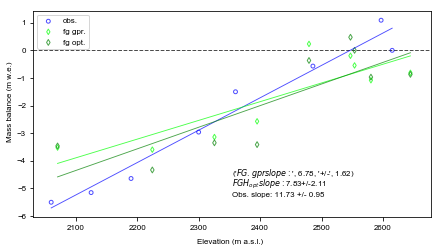

In [454]:
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import statsmodels.api as stm


font = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 8}

plt.rc('font', **font)

fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(6,3.34))#3.34, 3.34))
# j,k=0,0    ## only define j if one row
n = 0
s= 15 #markersize
yr = 2017#2016, 2017, 2018
a = 0.7
color=['b', 'lime', 'green']
obs = pd.read_csv(fl_path+ 'illec_bdot.csv')
##all_obs
obs = obs.dropna(subset=['Ba'])
x_ax_obs=obs[(obs.Year==yr)].Elev
y_ax_obs=obs[(obs.Year==yr)].Ba

##obs by bin
# x_ax_obs=FG_df._elevmean  #FG_df.elev_mean
# y_ax_obs=FG_df.b_obs16#b_obs

# Drop unrealistic FG smb:
new = FG_all.copy()

new = new[new.b_fg_we >-8.]
new = new[new.b_fg_we_gpr >-8.]
 
x_ax_fg_gpr=new.elev16_mea
y_ax_fg_gpr=new.b_fg_we_gpr

x_ax_fg_opt=new.elev16_mea   #FG_df.elev_mean
y_ax_fg_opt=new.b_fg_we

# for i in range(3):
#     x = [x_ax_obs, x_ax_fg_gpr, x_ax_fg_opt]
#     y = [y_ax_obs, y_ax_fg_gpr, y_ax_fg_opt]
#     fit = np.polyfit(x[i],y[i],2)
#     y_new = np.polyval(fit,x[i])
#     ax.plot(x[i],y_new,c=color[i], linewidth=1.0, linestyle='--', alpha=a-0.1)

### observations of SMB
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_ax_obs),np.array(y_ax_obs))
ax.scatter(x_ax_obs,y_ax_obs,color='b', label='obs.', alpha=a, s=s,facecolor='')
ax.plot(x_ax_obs,slope*x_ax_obs+intercept, color='b',label='', alpha=a, linewidth=0.9)

slopeG, interceptG, r_valueG, p_valueG, std_errG = stats.linregress(np.array(x_ax_fg_gpr),np.array(y_ax_fg_gpr))
ax.scatter(x_ax_fg_gpr,y_ax_fg_gpr,color='lime', label='fg gpr.', alpha=a, s=s,facecolor='', marker='d')
ax.plot(x_ax_fg_gpr,slopeG*x_ax_fg_gpr+interceptG, color='lime',label='', alpha=a, linewidth=0.9)

# X = [x_ax_obs, x_ax_fg_gpr, x_ax_fg_opt]
# Y = [y_ax_obs, y_ax_fg_gpr, y_ax_fg_opt]
# out=[]
# for i in range(3):
#      ## X usually means our input variables (or independent variables)
#      ## Y usually means our output/dependent variable
#     X_new = stm.add_constant(X[i]) ## let's add an intercept (beta_0) to our model
#     mod = stm.OLS(Y[i], X_new).fit()   #FG_all.b_fg_we_gpr, FG_all._elevmean) # stm.OLS(output, input)
#     predictions = mod.predict(X_new)
#     out.append(np.round(1000*mod.bse[1],2) )





#         ### flux gate from GPR thickness
#         slopeM, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(np.array(x_ax_fg),np.array(y_ax_fg))
#         ax.scatter(x_ax_fg,y_ax_fg,color='r', label='fgel', alpha=a, s=s+2, facecolor='')
#         ax.plot(x_ax_fg,slopeM*x_ax_fg+interceptM, color='r', label='', alpha=a, linewidth=0.9)
#         ax.text(0.5, 0.1, ['$obs. slope:$', np.round(slope,4)], transform=ax.transAxes)
#         ax.text(0.5, 0.2, ['$FG. slope:$', np.round(slopeM,4)], transform=ax.transAxes)

#         ax.text(0.05, 0.9, year[n], transform=ax.transAxes, fontweight='bold')

###flux gate from optimized thickness
slopeM_opt, interceptM_opt, r_valueM_opt, p_valueM_opt, std_errM_opt = stats.linregress(np.array(
    x_ax_fg_opt),np.array(y_ax_fg_opt))
ax.scatter(x_ax_fg_opt,y_ax_fg_opt,color='g', label='fg opt.', alpha=a, s=s+2, facecolor='', marker='d')
ax.plot(x_ax_fg_opt,slopeM_opt*x_ax_fg_opt+interceptM_opt, color='g', label='', alpha=a, linewidth=0.9)
ax.axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)

# ax.text(0.05, 0.9, 'All', transform=ax.transAxes, fontweight='bold')
txt='Obs. slope: ' + str(np.round(1000*slope,2))+ ' +/- ' + str(np.round(1000*std_err,2))
# txtO=
# txtG=
ax.text(0.5, 0.1, txt, transform=ax.transAxes)
ax.text(0.5, 0.15, (str('$FG ' + 'H_{opt}''slope:$')+ str(np.round(1000*slopeM_opt,2))+ '+/-' + str(np.round(1000*std_errM_opt,2))), transform=ax.transAxes)
ax.text(0.5, 0.2, ('$FG. gpr slope:$', np.round(1000*slopeG,2),'+/-', np.round(1000*std_errG,2)), transform=ax.transAxes)
#'$\frac{+}{-}$'

fig.subplots_adjust(bottom=0.12, top=0.98, hspace=0.1, left=0.07, right=0.99, wspace=0.05)#left=0.07, right=0.9,wspace=0.05, 
ax.legend(loc='best')#, bbox_to_anchor=(0, 0.42, 0.7, 0.5), labelspacing=0.2, handletextpad=0.1)
fig.text(0.01, 0.75, 'Mass balance (m w.e.)', rotation=90)
fig.text(0.45, 0.01, 'Elevation (m a.s.l.)')
plt.savefig(fl_path + 'products/' + 'illec_bdot_2017.png', dpi=300) #+ Glacier[gl]
plt.show()